# ARIM-Academy：　基礎編　Scikit-learn（分類）

## 本編の目標

Irisデータセットは、機械学習の初学者にとって非常に有用な、3種類のアイリスの品種を分類するための定番のデータセットです。このデータセットを用いて、以下の学習を行うことができます。

1. **分類アルゴリズムの実装**  

* ロジスティック回帰、決定木、ランダムフォレストなど: 様々な分類アルゴリズムを実装し、それぞれのアルゴリズムの特性を理解することができます。  
* ハイパーパラメータチューニング: 各アルゴリズムの性能を最大化するために、ハイパーパラメータを調整する方法を学ぶことができます。  

2. **モデル評価**  

* **混同行列**: 予測結果と正解ラベルを比較し、モデルの性能を詳細に評価する混同行列の作成方法を習得できます。  
* **性能指標**: 正解率、適合率、再現率、F1スコアなどの様々な性能指標を計算し、モデルの強みと弱みを把握することができます。  
* **クロスバリデーション**: モデルの汎化性能を評価するために、クロスバリデーションの手法を学ぶことができます。  

3. **データの可視化と解釈** 

* **特徴量の可視化**: 散布図やペアプロットなど、様々な可視化手法を用いて、特徴量の分布や相関関係を可視化し、データの特性を把握することができます。  
* **次元削減**: PCAなどの次元削減手法を用いて、高次元のデータを低次元空間に投影し、可視化することで、データの構造をより深く理解することができます。  
* **モデル解釈**: 決定木や線形モデルなどの解釈可能なモデルを用いることで、モデルの予測結果がどのように導き出されたのかを解釈することができます。  

---

## データセット

<div style="border:1px solid #000; padding:10px;">
Irisデータセットは、統計学や機械学習の分野で広く使用される有名なデータセットです。このデータセットは、植物学の分野で研究されているアヤメ（Iris）の花の特徴に関するデータを含んでいます。

Irisデータセットには、150のサンプルがあり、各サンプルはアヤメの花の特徴を表す4つの数値データで構成されています。これらの特徴は、がく片（sepal）の長さと幅、花びら（petal）の長さと幅を測定したものです。また、各サンプルは3つの異なるアヤメの品種（setosa、versicolor、virginica）に属しています。

データセットは、分類問題やクラス分類のアルゴリズムの評価や比較などに使用されます。特に、機械学習アルゴリズムの性能や汎化能力を評価するためのベンチマークデータセットとして広く利用されています。また、データの整形や可視化、特徴抽出、モデルのトレーニングなどの様々なデータ処理タスクに使用することができます。
</div>

---

### 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（<font color="red">Google colabに接続しない場合には不要</font>）

In [ ]:
!git clone https://github.com/ARIM-Academy/Advanced_Tutorial_1.git
%cd Advanced_Tutorial_1

# 1.データセットの読み込みと前処理

### ライブラリのインポート
カリキュラムで扱うpythonのライブラリを`import`文でロードします。機械学習のライブラリであるscikit-learnは後半でimportします。

In [1]:
#ライブラリ
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### サンプルファイルの読み込み
pandasライブラリの`read_csv()`はcsvファイルを読み込むメソッドであり、指定したファイルの読み込みます。ここでは[data]フォルダーに格納されているIris.csvのファイルのをデータフレームとして読み込み、そのデータフレームはdfという変数に格納します。

In [3]:
#データセットの読み込み
df=pd.read_csv("data/Iris.csv")

In [4]:
#データセットの確認
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. データの俯瞰（探索的データ分析）

### ①概要統計
Irisデータセットの花弁の長さ、花弁の幅、がく片の長さ、がく片の幅の4つの数値型の概要統計を出力します。

In [7]:
#概要統計
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### ②　ペアプロット（散布図行列）

Irisデータセットにペアプロットを適用することで、以下の情報を得ることができます。

* **特徴量間の関係**: 異なる特徴量間の関係を視覚的に確認できます。例えば、花弁の長さと幅が正の相関関係にあるか、負の相関関係にあるかなどを一目でわかります。
* **クラス間の分離性**: 各品種（Setosa、Versicolor、Virginica）のデータがどのように分布しているか、他の品種とどの程度分離しているかを確認できます。
* **外れ値の検出**: データに含まれる外れ値を視覚的に確認することができます。
* **特徴量選択**: どの特徴量が品種の分類に最も貢献しているか、あるいは冗長な特徴量があるかなどを判断する手がかりになります。


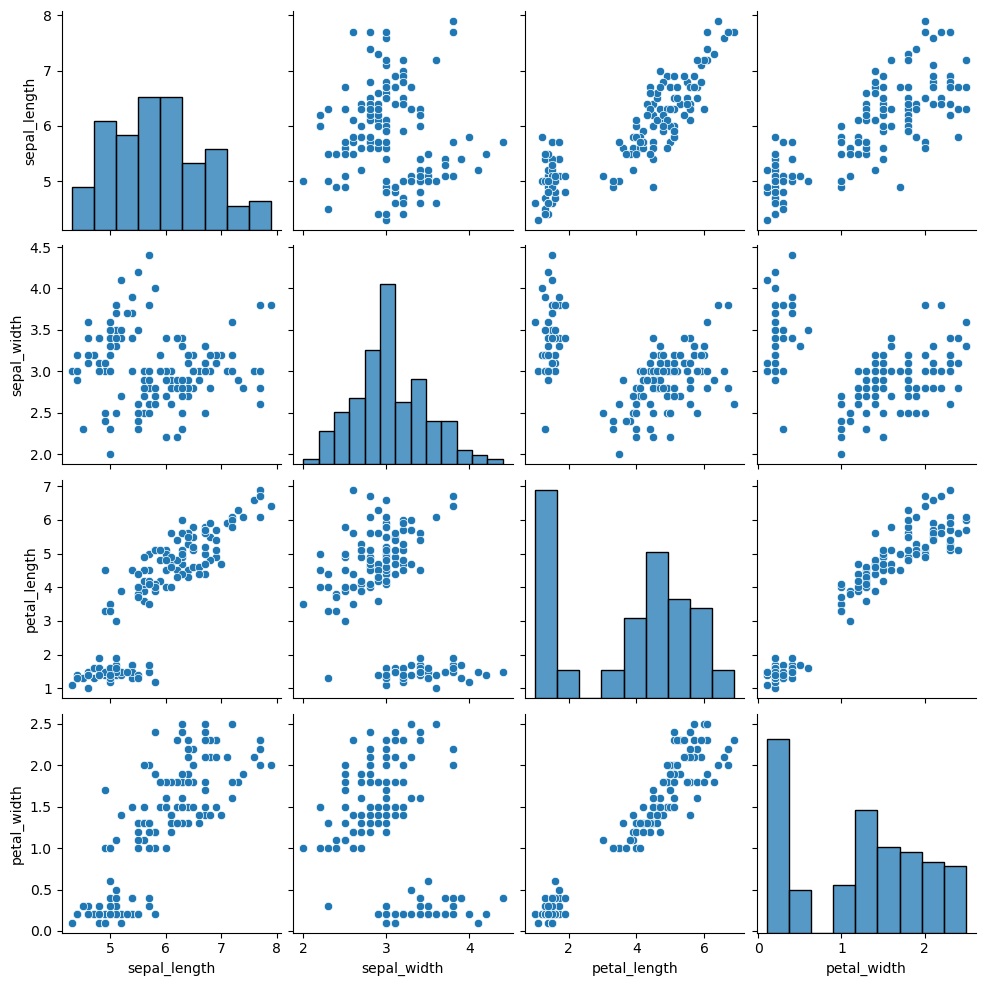

In [13]:
#　ペアプロットによる各変数間の二次元空間像
sns.pairplot(df)
plt.show()

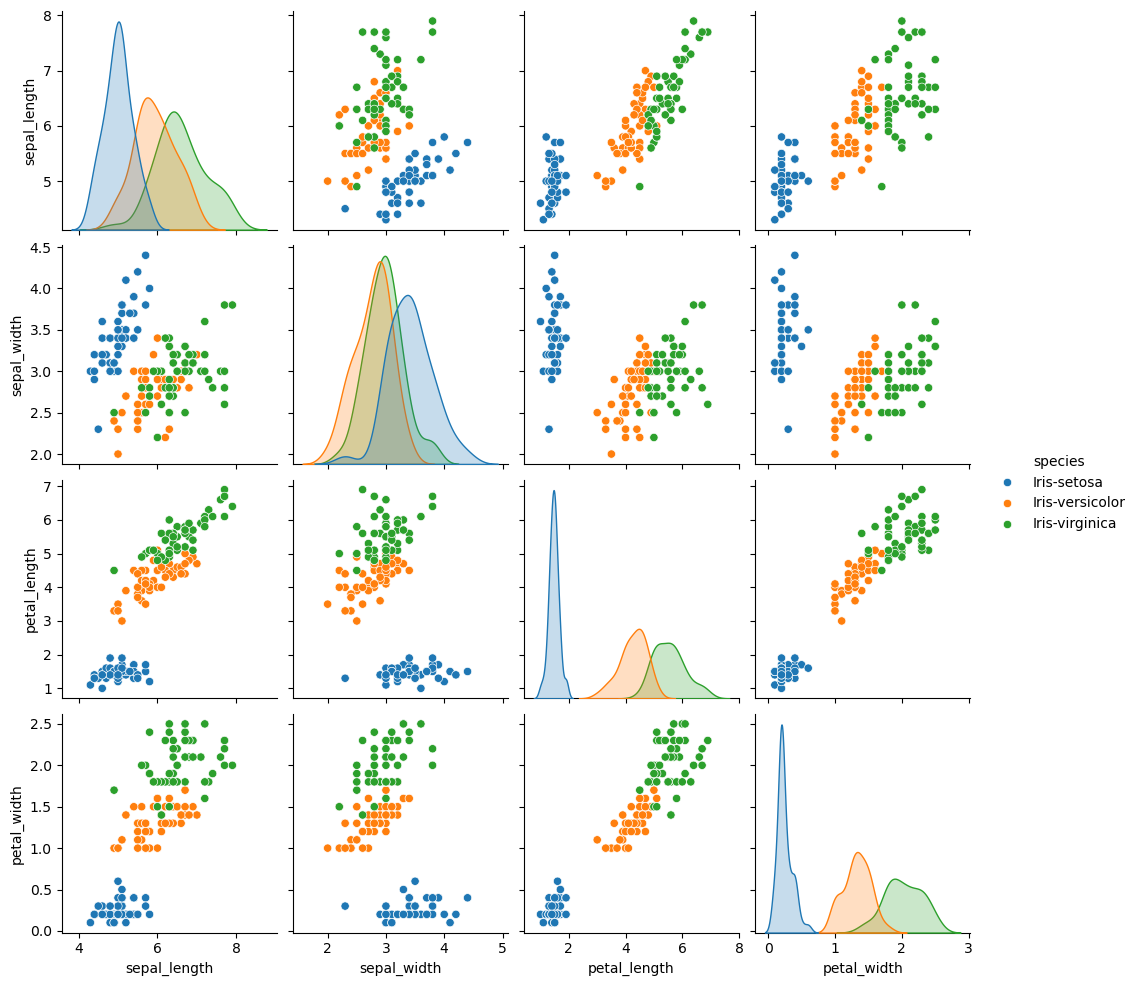

In [14]:
#　ペアプロットによる各変数間の二次元空間像（その２）
sns.pairplot(df,hue='species')
plt.show()

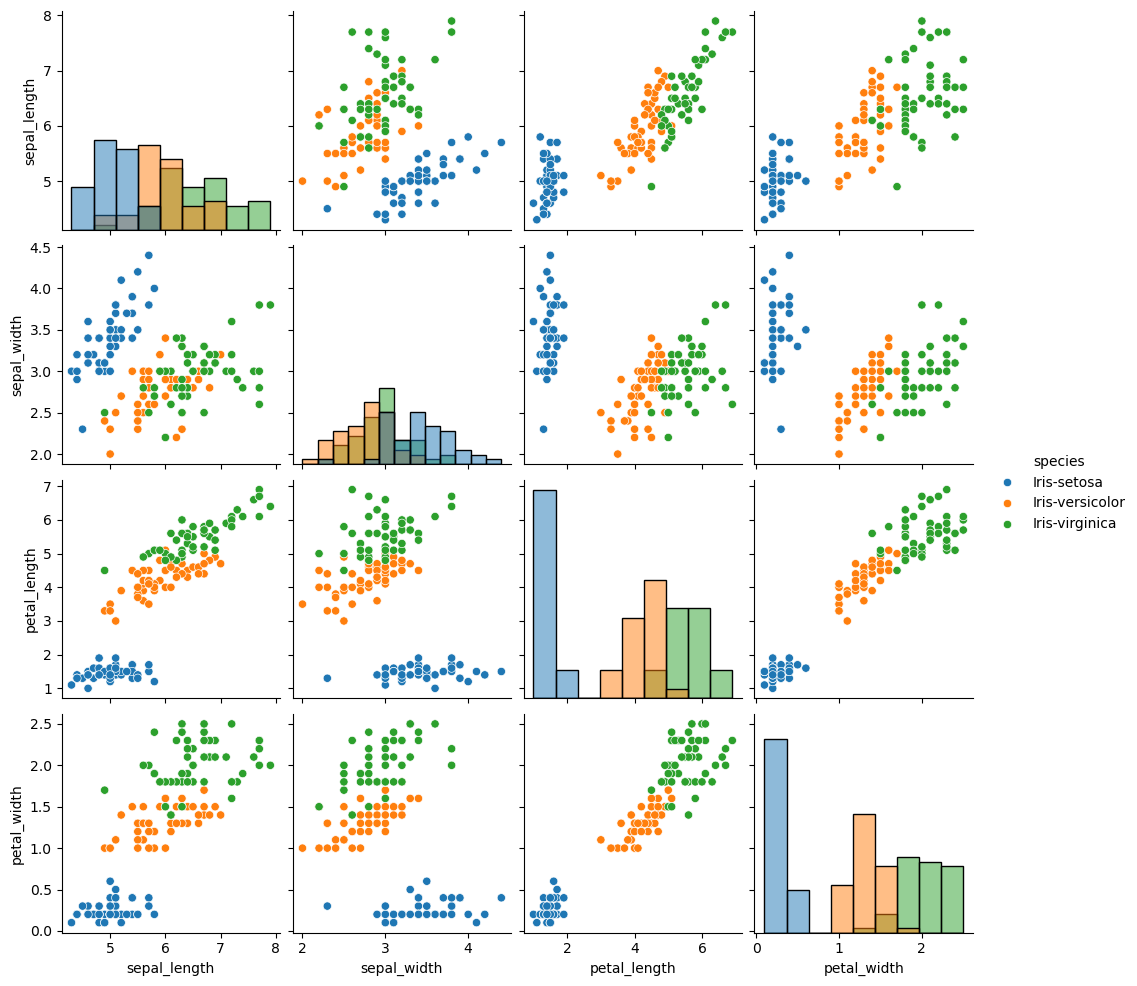

In [15]:
#　ペアプロットによる各変数間の二次元空間像（その３）
sns.pairplot(df,hue='species',diag_kind='hist')
plt.show()

### ③　グラフ化
setosaからvirginicaまでの各品種について、ガクの長さ（sepal_length）とガクの幅（sepal_width）のデータのみを取り出し、新たなデータフレームを作成しましょう。その後、このデータフレームをグラフ化することで、各品種のガクの長さと幅の関係を可視化できます。

PythonのライブラリPandasのilocを用いて、品種ごとにデータを選択し、新たなデータフレームを作成することができます。

In [19]:
# 品種ごとの分割
setosa = df.iloc[:50,[0,1]]
versicolor = df.iloc[51:100,[0,1]]
virginica = df.iloc[101:150,[0,1]]

#### 【解説】データセットの分割

`iloc`は、Pythonのpandasライブラリで提供されるメソッドであり、データフレーム内の行と列を位置（整数のインデックス）を使用して選択するために使用されます。以下に、`iloc`を使用してデータを分割する方法の説明文を示します。

データの分割には、まずデータフレームを特定の行と列の範囲で切り出し、それを新しいデータフレームとして取得する手順が含まれます。`iloc`を使うと、行や列を整数の位置に基づいて指定することができます。

データフレームを行方向に分割する場合：

```python
# データフレームを分割する
split_data = data.iloc[start_row:end_row, :]

# start_row: 分割の開始行の位置（整数）
# end_row: 分割の終了行の位置（整数）
# : (コロン): 列方向はすべての列を選択することを示します

# 分割されたデータを新しいデータフレームとして取得する
```

データフレームを列方向に分割する場合：

```python
# データフレームを分割する
split_data = data.iloc[:, start_column:end_column]

# : (コロン): 行方向はすべての行を選択することを示します
# start_column: 分割の開始列の位置（整数）
# end_column: 分割の終了列の位置（整数）

# 分割されたデータを新しいデータフレームとして取得する
```

上記のコード内の`start_row`、`end_row`、`start_column`、`end_column`には、分割の開始位置と終了位置を指定する整数値が入ります。開始位置と終了位置は、データフレーム内の行や列のインデックスの位置を表します。

`iloc`を使用することで、データフレームを指定した行と列の範囲で分割し、新しいデータフレームとして取得することができます。これにより、データの部分集合を効果的に取得し、それを別の解析や処理のために使用することができます。

In [23]:
#分割されたsetosaの確認
setosa

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


### ガク長とガク幅のデータ空間におけるプロット

Irisデータセットは、アヤメの3品種（Setosa、Versicolor、Virginica）を、花弁やがく片の長さ、幅といった特徴量で区別するための、よく知られたデータセットです。このデータセットのガクの長さとガクの幅に着目し、散布図を用いて可視化することで、品種間の違いを視覚的に捉え、特徴量間の関係性を分析することができます。

散布図では、各データ点を座標平面上に点としてプロットします。Irisデータセットの場合、x軸: ガクの長さ、y軸: ガクの幅としてプロットすることで、各品種のデータがどのように分布しているか、そして品種間でどのような特徴の違いがあるのかを視覚的に確認できます。

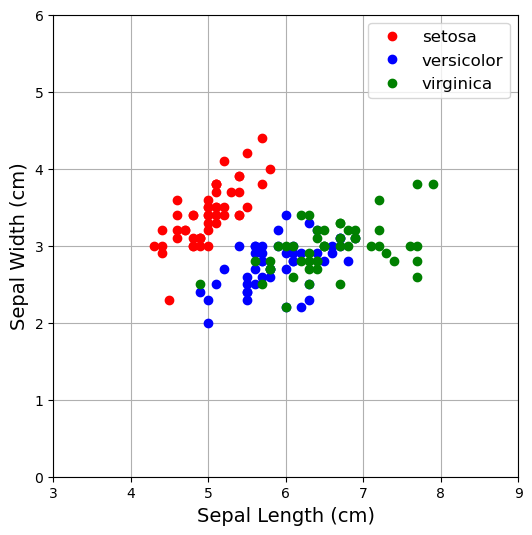

In [26]:
# matplotlibの初期設定
fig = plt.figure(figsize=(6,6))

# 3品種のデータのプロット
plt.plot(setosa['sepal_length'], setosa['sepal_width'], 'o', c='red')
plt.plot(versicolor['sepal_length'], versicolor['sepal_width'], 'o', c='blue')
plt.plot(virginica['sepal_length'], virginica['sepal_width'], 'o', c='green')

# 軸ラベル等
plt.xlabel("Sepal Length (cm)", fontsize =14)
plt.ylabel("Sepal Width (cm)", fontsize =14)
plt.xlim(3,9)
plt.ylim(0, 6)

plt.legend(['setosa','versicolor','virginica','test'], fontsize = 12)

plt.grid()
plt.show()

#### 【解説】散布図について
pythonでグラフ化するときにすぐれているのはmatplotlibライブラリです。その中で、`plt.plot()`は、PythonのMatplotlibライブラリの関数であり、グラフを作成するために使用されます。この関数は、与えられたデータを基に線グラフや散布図を描画します。

以下に、`plt.plot()`の基本的な使用法と一般的なパラメータの説明を示します：

```python
import matplotlib.pyplot as plt

# データの準備
x = [1, 2, 3, 4, 5]  # x軸の値
y = [2, 4, 6, 8, 10]  # y軸の値

# 線グラフの作成
plt.plot(x, y)

# グラフの表示
plt.show()
```

上記のコードでは、`x`と`y`にデータのリストを指定しています。`plt.plot(x, y)`は、`x`をx軸の値、`y`をy軸の値として線グラフを作成します。その後、`plt.show()`を呼び出すことで、グラフが表示されます。

`plt.plot()`関数には、さまざまなオプションや引数を指定することができます。以下によく使用されるパラメータをいくつか説明します：

- **`color`（色）**: グラフの線の色を指定します。一般的な色の指定方法は、`'r'`（赤）、`'g'`（緑）、`'b'`（青）などのショートカット文字列または、`'red'`（赤）、`'green'`（緑）、`'blue'`（青）などのカラーネームを使用します。
- **`linestyle`（線のスタイル）**: グラフの線のスタイルを指定します。一般的なスタイルの指定方法は、`'-'`（実線）、`'--'`（破線）、`':'`（点線）などの文字列を使用します。
- **`marker`（マーカー）**: 散布図を描画する場合に、各データポイントのマーカーのスタイルを指定します。`'o'`（円）、`'s'`（四角）、`'+'`（プラス記号）などが一般的なマーカースタイルです。
- **`label`（ラベル）**: グラフの凡例（レジェンド）に表示されるグラフのラベルを指定します。
- **`xlabel`（x軸ラベル）** および **`ylabel`（y軸ラベル）**: x軸とy軸のラベルを指定します。

これらのパラメータや他のオプションを使って、グラフの見た目やスタイルをカスタマイズすることができます。また、`plt.plot()`を複数回呼び出すことで、複数の線グラフや散布図を同じプロット上に表示することも可能です。

Matplotlibの`plt.plot()`は非常に柔軟な機能を提供しており、さまざまなグラフの描画に活用できます。

# 3. scikit-learnによる機械学習モデルの比較

### データセットの分割（Data set splitting）
データセットの分割（Data set splitting）は、機械学習モデルの訓練と評価のために、データセットを訓練データとテストデータに分けるプロセスを指します。モデルがテストデータに対してどれくらい正確に予測できるかを評価することで、モデルの汎化能力や性能を測定します。

**訓練データ（Training Data）**：　機械学習モデルの訓練に使用されるデータセットです。モデルは、訓練データを分析してパターンや関連性を学習し、未知のデータに対して予測を行うための知識を獲得します。

**テストデータ（Test Data）**：モデルの訓練後に性能を評価するために使用されるデータセットです。テストデータは、訓練データとは異なるデータでなければなりません。

In [31]:
# 説明変数と目的変数の用意しましょう

X = df.iloc[0:, 0:4] #ガクと花びらの長さ、幅を説明変数とします
y = df.iloc[0:, 4]   # 品種を目的変数とします

In [33]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [37]:
#データセットの分割のライブラリの読み込み
from sklearn.model_selection import train_test_split

# train_test_split関数によるデータセット分割
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,   # 20%をテストデータとするデータ分割
                                                    stratify = y,      # ３つの品種について均等分割
                                                    random_state=42
                                                    )  

In [38]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.1,1.5,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [40]:
y_train

8          Iris-setosa
106     Iris-virginica
76     Iris-versicolor
9          Iris-setosa
89     Iris-versicolor
            ...       
37         Iris-setosa
2          Iris-setosa
33         Iris-setosa
52     Iris-versicolor
3          Iris-setosa
Name: species, Length: 120, dtype: object

### scikit-learnによる分類モデルの選択

scikit-learnは、機械学習のアルゴリズムをPythonで実装するためのライブラリです。特に、分類問題においては、ロジスティック回帰、k近傍法、サポートベクターマシン、決定木、ランダムフォレスト、ニューラルネットワークなど、様々なアルゴリズムが提供されています。どのモデルを選ぶべきかは、**データの特性**（線形か非線形か、データの量、ノイズの有無など）や、**タスクの要件**（精度、解釈性、計算時間など）によって異なります。

**主な分類モデルの特徴**

* **ロジスティック回帰:**
  - 線形モデルの一種で、入力データからクラスの所属確率を予測します。
  - データが線形に分離可能な場合や、特徴量の重要度を把握したい場合に適しています。
* **k近傍法:**
  - 新しいデータ点に対して、最も近いk個のデータ点のラベルを参照して、そのデータ点のラベルを決定します。
  - データが局所的な構造を持つ場合や、非線形な境界を持つ場合に有効です。
* **サポートベクターマシン:**
  - データを最もよく分離する超平面（決定境界）を見つけ、新しいデータを分類します。
  - マージン最大化という概念に基づいており、一般化性能が高いことが期待できます。
* **決定木:**
  - データを順次分割していくことで、決定規則を樹形図で表現するモデルです。
  - 非線形な関係を捉えることができ、解釈性が高い点が特徴です。
* **ランダムフォレスト:**
  - 複数の決定木を組み合わせることで、過学習を防ぎ、汎化性能を向上させたモデルです。
  - さまざまな種類のデータに対して高い精度を発揮します。
* **ニューラルネットワーク:**
  - 人間の脳神経回路を模倣したモデルで、複雑なパターンを学習することができます。
  - 大規模なデータセットや画像認識、自然言語処理など、高度なタスクに適用されます。

**モデル選択のポイント**

* **データの探索:** データの分布、特徴量間の関係、外れ値などを可視化し、データの特性を把握します。
* **アルゴリズムの特性:** 各アルゴリズムの強みと弱みを理解し、データの特性に合ったアルゴリズムを選びます。
* **ハイパーパラメータチューニング:** アルゴリズムのパラメータを調整することで、モデルの性能を向上させることができます。
* **交差検証:** モデルの汎化性能を評価するために、交差検証を行います。

scikit-learnは、様々な分類モデルを提供しており、適切なモデルを選択することで、高い精度で分類問題を解決することができます。モデル選択は、データの特性やタスクの要件に合わせて、慎重に行う必要があります。ここでは決定木、ランダムフォレスト、サポートベクターマシーンの3つについてのモデルを検討します。

## 1. 決定木
決定木は、データの属性値を基に、一連のif-thenルールを適用することで、目的変数を予測する非線形モデルです。

### ①　モデル構築
DecisionTreeClassifier クラスは、Scikit-learnライブラリが提供するクラスで、分類型による決定木モデルを構築するために使用されます。

In [46]:
# 決定木法のインポート（クラス指定）
from sklearn.tree import DecisionTreeClassifier

# 決定木法によるモデル構築（トレーニング）
model = DecisionTreeClassifier()
model.fit(X_train, y_train)   

DecisionTreeClassifier()

#### ②　モデルの評価：精度の計算
#### 訓練データ

In [49]:
#訓練データの予測ラベル
y_pred_train = model.predict(X_train)

In [51]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:1.000


#### テストデータ

In [54]:
#テストデータの予測ラベル
y_pred_test = model.predict(X_test)

In [56]:
# テストデータの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.967


### ③　混同行列

混同行列は、機械学習の分類問題において、モデルの性能を評価するために用いられる指標です。特に、不均衡データ（あるクラスのデータが圧倒的に多いデータセット）や、コスト感度の高い誤分類（ある種類の誤分類が他の種類よりも重大な場合）を扱う際に、これらの指標は非常に有効です。  

混同行列:予測結果と実際のラベルを2×2の表にまとめたもので、表の各要素は、以下の4つの状態を表します。  
* TP (True Positive): 正しく陽性と予測  
* FP (False Positive): 誤って陽性と予測（偽陽性）  
* TN (True Negative): 正しく陰性と予測  
* FN (False Negative): 誤って陰性と予測（偽陰性）  

混同行列から、精度、適合率、再現率などの評価指標を計算できます。  

#### 訓練データ

**混同行列の算出　その１**  
sklearn.metrics モジュールにある混同行列を計算するための関数 confusion_matrix を用いる方法です。なお、sklearn.metrics はscikit-learnライブラリが提供する様々な評価指標を計算するための関数群です。

In [60]:
# scikit-learnのconfution_matrixを使った混同行列の表記方法

from sklearn import metrics
print(metrics.confusion_matrix(y_pred_train, y_train))

[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


**混同行列の算出　その2**  
Pandasライブラリのcrosstab関数を使用して、混同行列を作成します。

In [63]:
# pandasのcrosstbを使った混同行列の別の表記方法

pd.crosstab(y_pred_train, y_train, margins = True) 

species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,40,0,0,40
Iris-versicolor,0,40,0,40
Iris-virginica,0,0,40,40
All,40,40,40,120


#### テストデータ

In [66]:
# pandasのcrosstbを使った混同行列の別の表記方法

pd.crosstab(y_pred_test, y_test, margins = True) 

species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,9,0,9
Iris-virginica,0,1,10,11
All,10,10,10,30


In [68]:
print(metrics.confusion_matrix(y_pred_test, y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


## 2. ランダムフォレスト
RandomForestClassifier クラスは、Scikit-learnライブラリが提供するクラスで、分類型によるランダムフォレストモデルを構築するために使用されます。

#### ①モデル構築

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)   

RandomForestClassifier()

### ②　モデルの評価：精度の計算および混同行列
#### 訓練データ

In [73]:
y_pred_train = model.predict(X_train)

In [76]:
print ("RandomForestClassifier training score : {:.3f}".format(model.score(X_train, y_train)))
pd.crosstab(y_pred_train, y_train, margins = True) 

RandomForestClassifier training score : 1.000


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,40,0,0,40
Iris-versicolor,0,40,0,40
Iris-virginica,0,0,40,40
All,40,40,40,120


#### テストデータ

In [79]:
y_pred_test = model.predict(X_test)  

In [81]:
print ("RandomForestClassifier test score : {:.3f}".format(model.score(X_test, y_test)))
pd.crosstab(y_pred_test, y_test, margins = True) 

RandomForestClassifier test score : 0.933


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,9,1,10
Iris-virginica,0,1,9,10
All,10,10,10,30


### 3.サポートベクターマシーン

SVC クラスは、Scikit-learnライブラリが提供するクラスで、分類型によるサポートベクターマシーンモデルを構築するために使用されます。

### ① モデル構築

In [84]:
# サポートベクター
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)   

SVC()

### ②　モデルの評価：精度の計算および混同行列
#### 訓練データ

In [87]:
y_pred_train = model.predict(X_train)

In [89]:
print ("SupportVectorClassifier training score : {:,.3f}".format(model.score(X_train, y_train)))
pd.crosstab(y_pred_train, y_train, margins = True) 

SupportVectorClassifier training score : 0.983


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,40,0,0,40
Iris-versicolor,0,39,1,40
Iris-virginica,0,1,39,40
All,40,40,40,120


#### テストデータ

In [92]:
y_pred_test = model.predict(X_test)

In [94]:
print ("SupportVectorClassifier test score : {:,.3f}".format(model.score(X_test, y_test)))
pd.crosstab(y_pred_test, y_test, margins = True) 

SupportVectorClassifier test score : 0.967


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,9,0,9
Iris-virginica,0,1,10,11
All,10,10,10,30


## Closing：おわりに
Irisデータセットを使い、3クラス分類を行う機械学習モデルの操作を体験しました。このセクションでは次のことを学びました。

1. 分類アルゴリズムの評価: アヤメの3つの品種（Setosa、Versicolor、Virginica）はそれぞれ異なる特徴を持つことを理解し、Irisデータセットを使用してアルゴリズムの分類性能を評価して確かめました。

2. データの一般化と汎化性能の評価: Irisデータセットは比較的小さく、簡単に分類できるデータセットですが、用いる機械学習モデルの違いにより汎化性能が異なることを理解しました。モデルがIrisデータセットに過剰適合することなく新しいデータや異なるデータセットに対しても適切な分類結果を出力できるかどうかを確認することができました。